# 01. Building Convnets I - Filter Sizes, Receptive Fields

### Convolutional Neural Network
- Understanding CNN's Better
- Lets build a small Convnet to classify MNIST Dataset

In [1]:
from keras.layers import *
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
# Build A Model

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) # No Of Filter = 32
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1))) # No Of Filter = 64
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1))) # No Of Filter = 64
model.add(MaxPool2D(2,2))

W0626 03:27:51.145355 139916791232320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0626 03:27:51.496371 139916791232320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0626 03:27:51.500228 139916791232320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0626 03:27:51.542849 139916791232320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [3]:
MaxPool2D?

##### strides: Integer, tuple of 2 integers, or None.
        Strides values.
        If None, it will default to `pool_size`.

# 02. Building Convnets-II Training CNN In Keras

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 1, 1, 64)          0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [5]:
# Build A Model

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) # No Of Filter = 32
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1))) # No Of Filter = 64
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1))) # No Of Filter = 64
model.add(Flatten())

In [6]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Build A Model

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) # No Of Filter = 32
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1))) # No Of Filter = 64
model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1))) # No Of Filter = 64
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                36928     
__________

In [9]:
# We will add some Regularization like Dropouts later on.

from keras.datasets import mnist
from keras.utils import to_categorical

In [10]:
(XTrain,YTrain),(XTest,YTest)=mnist.load_data()

In [11]:
print(XTrain.shape,YTrain.shape)
print(XTest.shape,YTest.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [12]:
def preprocess_data(X,Y):
    X=X.reshape((-1,28,28,1))
    X=X/255.0  # Noramalisation
    
    Y=to_categorical(Y)
    
    return X,Y

In [13]:
XTrain,YTrain=preprocess_data(XTrain,YTrain)
print(XTrain.shape,YTrain.shape)
XTest,YTest=preprocess_data(XTest,YTest)
print(XTest.shape,YTest.shape)

(60000, 28, 28, 1) (60000, 10)
(10000, 28, 28, 1) (10000, 10)


In [14]:
# Compile
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

W0626 03:27:55.079627 139916791232320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0626 03:27:55.155878 139916791232320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [15]:
# Fit (Training)

model.fit(XTrain,YTrain,epochs=10,batch_size=128)

W0626 03:27:55.573436 139916791232320 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0626 03:27:55.690798 139916791232320 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/10
60000/60000 [==============================] - 52s 860us/step - loss: 0.2449 - acc: 0.9281
Epoch 2/10
60000/60000 [==============================] - 43s 722us/step - loss: 0.0610 - acc: 0.9809
Epoch 3/10
60000/60000 [==============================] - 44s 738us/step - loss: 0.0427 - acc: 0.9867
Epoch 4/10
60000/60000 [==============================] - 45s 757us/step - loss: 0.0329 - acc: 0.9898
Epoch 5/10
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0280 - acc: 0.9910
Epoch 6/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.0224 - acc: 0.9927
Epoch 7/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0194 - acc: 0.9936
Epoch 8/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0170 - acc: 0.9944
Epoch 9/10
60000/60000 [==============================] - 97s 2ms/step - loss: 0.0141 - acc: 0.9954
Epoch 10/10
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0121 - acc

# 03. Building Convnets III - Effect Of Pooling Layers

In [16]:
# Model Compilation
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
hist=model.fit(XTrain,YTrain,epochs=20,validation_split=0.1,batch_size=128) # Perform this on google collab for training it in less time

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 68s 1ms/step - loss: 0.0118 - acc: 0.9957 - val_loss: 0.0140 - val_acc: 0.9957
Epoch 2/20
54000/54000 [==============================] - 45s 831us/step - loss: 0.0101 - acc: 0.9965 - val_loss: 0.0174 - val_acc: 0.9945
Epoch 3/20
54000/54000 [==============================] - 47s 861us/step - loss: 0.0088 - acc: 0.9971 - val_loss: 0.0193 - val_acc: 0.9943
Epoch 4/20
54000/54000 [==============================] - 47s 865us/step - loss: 0.0078 - acc: 0.9975 - val_loss: 0.0188 - val_acc: 0.9942
Epoch 5/20
54000/54000 [==============================] - 42s 772us/step - loss: 0.0057 - acc: 0.9984 - val_loss: 0.0119 - val_acc: 0.9972
Epoch 6/20
54000/54000 [==============================] - 43s 791us/step - loss: 0.0081 - acc: 0.9971 - val_loss: 0.0161 - val_acc: 0.9950
Epoch 7/20
54000/54000 [==============================] - 41s 762us/step - loss: 0.0059 - acc: 0.9978 - val_loss: 0.023

In [17]:
model.evaluate(XTest,YTest)

10000/10000 [==============================] - 3s 293us/step


[0.041141653494219145, 0.9914]

In [18]:
# Build A Model

model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) # No Of Filter = 32
#model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1))) # No Of Filter = 64
#model.add(MaxPool2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1))) # No Of Filter = 64
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 22, 22, 64)        36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 30976)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                1982528   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                650       
Total params: 2,038,922
Trainable params: 2,038,922
Non-trainable params: 0
_________________________________________________________________


# 04. Image Data Augmentation

### Data Augmentation
- Deep Learning Models are "Data Hungry"
- Small Datasets lead to overfitting most of the times
- So lets generate more data by augmenting the training samples

In [20]:
img_path="../Pictures/images/horses/horse-100.jpg"

In [21]:
from keras.preprocessing import image
from matplotlib import pyplot as plt

In [22]:
img=image.load_img(img_path,target_size=(100,100))

In [23]:
x=image.img_to_array(img)/255.0

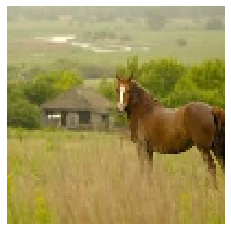

In [24]:
plt.imshow(x)
plt.axis("off")
plt.show()

In [25]:
x=x.reshape((1,100,100,3))

In [26]:
datagen=image.ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [27]:
image.ImageDataGenerator?

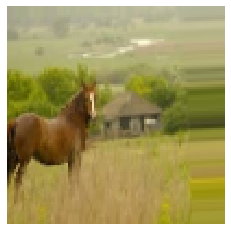

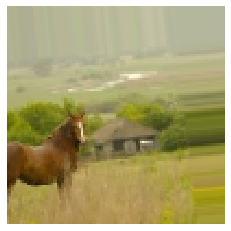

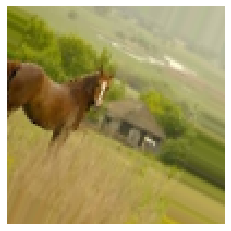

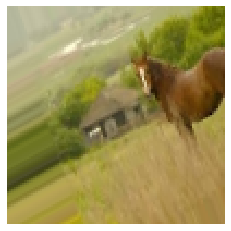

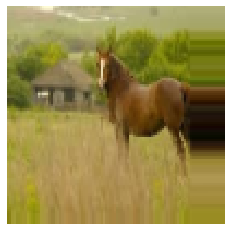

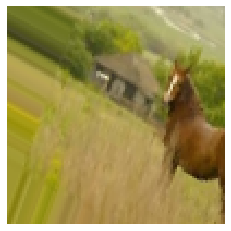

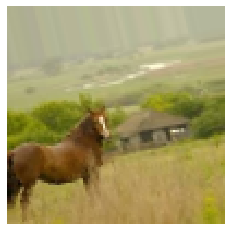

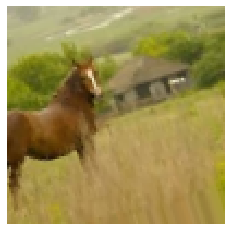

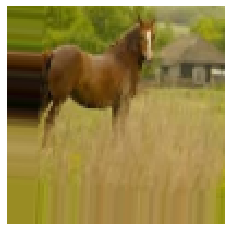

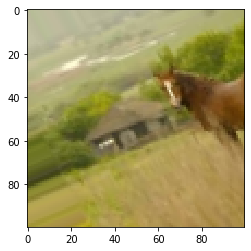

In [28]:
i=0
for batch in datagen.flow(x,batch_size=1):
    plt.figure()
    imgplot=plt.imshow(image.img_to_array(batch[0]))
    i+=1
    if i==10:
        break
    plt.axis("off")
    plt.show()